# Midterm Preparation

This script prepares you for the midterm exam by showing you how to upload a prediction file to the midterm platform.
Note, this is just a sample data set. 

In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import balanced_accuracy_score

In [2]:
# Data Preparation
# Load the data and perform any necessary data cleaning or preprocessing steps.

data = pd.read_csv("sample_data.csv")

# Split data into labeled (train) and unlabeled (pred) sets
data_train = data[data['label'].notna()].copy()
data_pred = data[data['label'].isna()].copy()
data_prediction = data[data['label'].isna()].copy()

print(f"Training Data Shape: {data_train.shape}")
print(f"Prediction Data Shape: {data_pred.shape}")

Training Data Shape: (8000, 12)
Prediction Data Shape: (2000, 12)


In [3]:
data_train.reset_index(drop=True, inplace=True)
data_train

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,label,id
0,0.496714,Category B,0,Gamma,0.639020,2025-03-26 15:59:23.583406,-1.730313,28.809456,-1.602207,0,0.0,0
1,-0.138264,Category D,0,Epsilon,-1.499596,2025-11-11 15:59:23.583406,0.657393,48.421778,1.219424,0,0.0,1
2,1.523030,Category C,1,Gamma,-0.513274,2025-02-22 15:59:23.583406,0.309410,4.187600,1.257345,0,0.0,3
3,-0.234137,Category B,1,Gamma,0.129776,2025-02-10 15:59:23.583406,0.589638,95.701685,0.655647,1,1.0,5
4,0.767435,Category C,0,Epsilon,0.151608,2025-09-03 15:59:23.583406,-0.231937,31.029100,0.162607,0,0.0,7
...,...,...,...,...,...,...,...,...,...,...,...,...
7995,1.194214,Category D,1,Delta,-0.436053,2025-02-24 15:59:23.583406,0.692300,54.924194,0.717847,0,1.0,9994
7996,1.301102,Category A,1,Gamma,-1.333080,2025-03-29 15:59:23.583406,0.275313,34.677941,-0.800432,1,0.0,9995
7997,-1.998345,Category D,1,Gamma,-0.282302,2025-04-01 15:59:23.583406,0.055227,33.616555,-1.615167,1,0.0,9996
7998,-0.705317,Category A,1,Gamma,-0.093354,2024-12-21 15:59:23.583406,0.929104,12.334212,-0.311622,0,0.0,9997


In [4]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   feature1   8000 non-null   float64
 1   feature2   8000 non-null   object 
 2   feature3   8000 non-null   int64  
 3   feature4   8000 non-null   object 
 4   feature5   8000 non-null   float64
 5   feature6   8000 non-null   object 
 6   feature7   8000 non-null   float64
 7   feature8   8000 non-null   float64
 8   feature9   8000 non-null   float64
 9   feature10  8000 non-null   int64  
 10  label      8000 non-null   float64
 11  id         8000 non-null   int64  
dtypes: float64(6), int64(3), object(3)
memory usage: 750.1+ KB


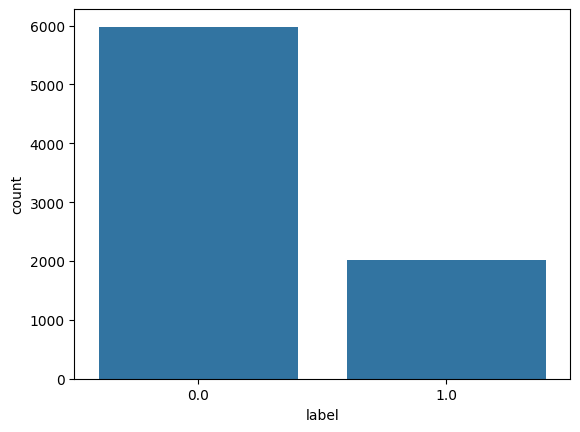

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='label', data=data_train);

Feature2

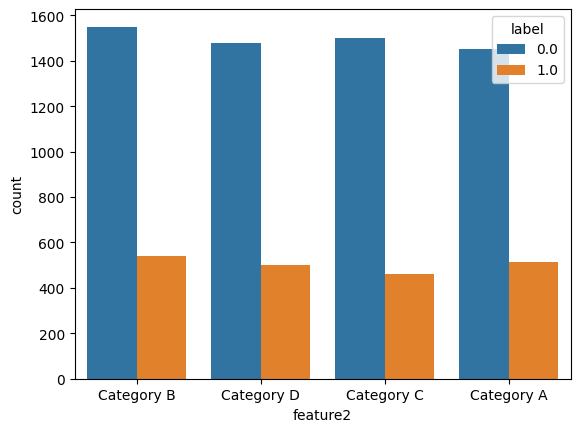

In [6]:
sns.countplot(x="feature2",hue="label", data=data_train);  

Feature 1

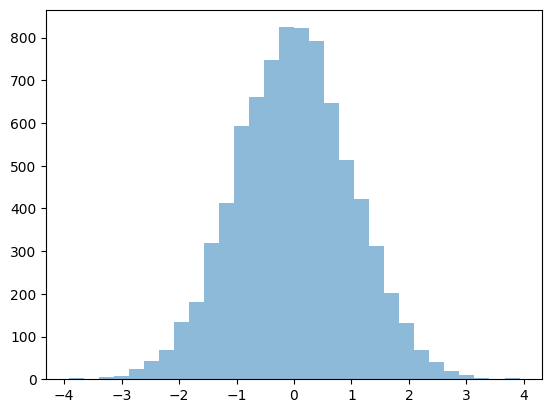

In [7]:
plt.hist(data=data_train, x='feature1',bins=30, alpha=0.5);

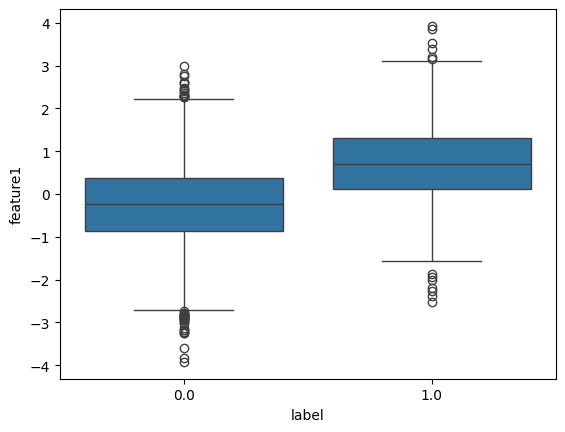

In [8]:
sns.boxplot(data=data_train, x='label',y='feature1');

Feature 3

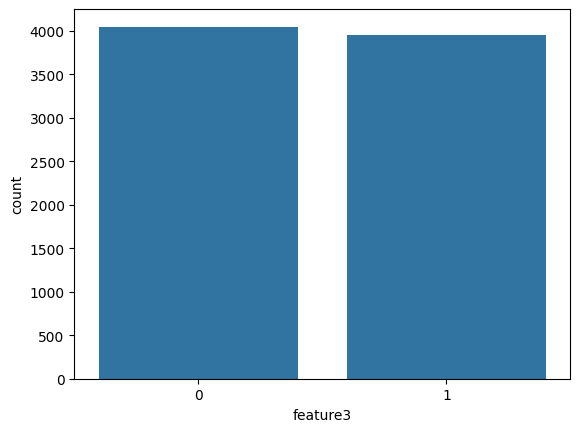

In [9]:
sns.countplot(x='feature3',data=data_train);

<Axes: xlabel='feature3', ylabel='count'>

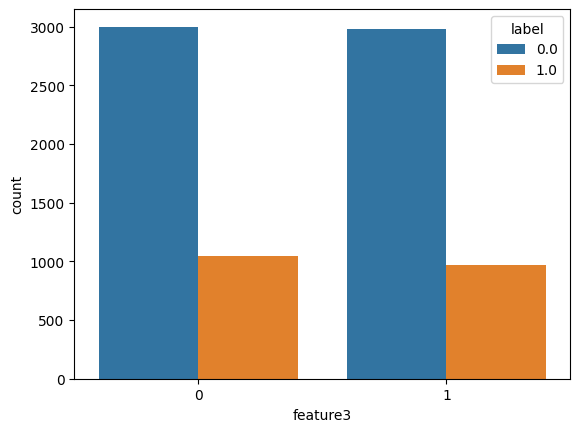

In [10]:
sns.countplot(data=data_train, x='feature3',hue='label')

Feature 4

In [11]:
data_train.feature4.unique()

array(['Gamma', 'Epsilon', 'Delta', 'Alpha', 'Beta'], dtype=object)

<Axes: xlabel='feature4', ylabel='count'>

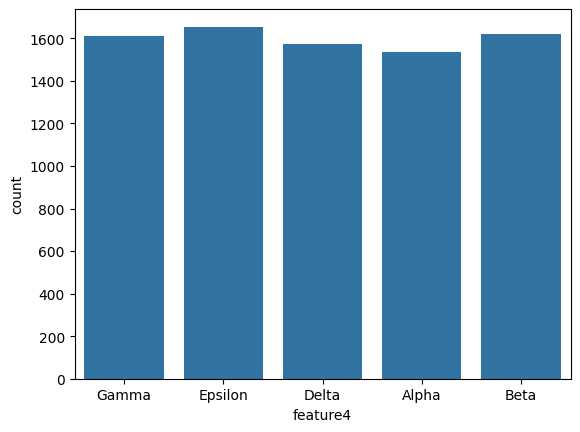

In [12]:
sns.countplot(data=data_train, x='feature4')

<Axes: xlabel='feature4', ylabel='count'>

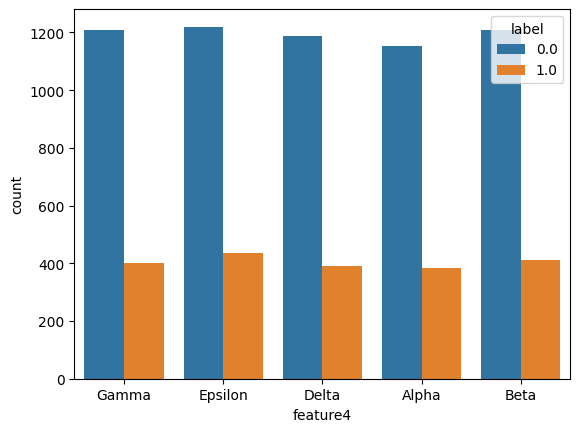

In [13]:
sns.countplot(data=data_train, x='feature4',hue='label')

Feature 5

<Axes: xlabel='label', ylabel='feature5'>

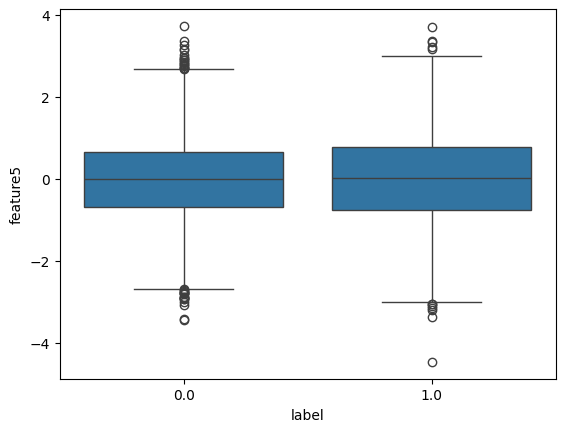

In [14]:
sns.boxplot(data=data_train,x='label',y='feature5')

Feature 6 (we drop it)

Feature 7

<Axes: xlabel='label', ylabel='feature7'>

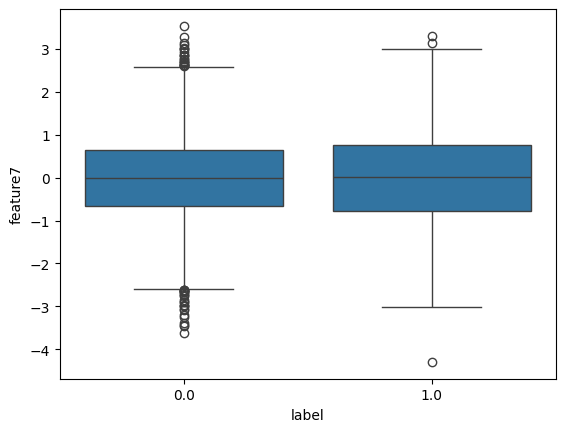

In [15]:
sns.boxplot(data=data_train,x='label',y='feature7')

<Axes: xlabel='label', ylabel='feature8'>

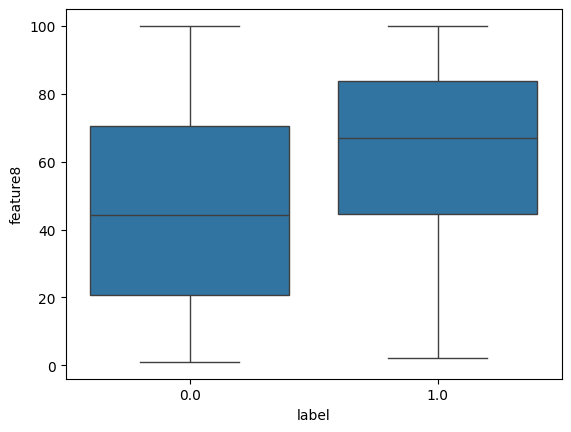

In [16]:
sns.boxplot(data=data_train,x='label',y='feature8')

<Axes: xlabel='label', ylabel='feature9'>

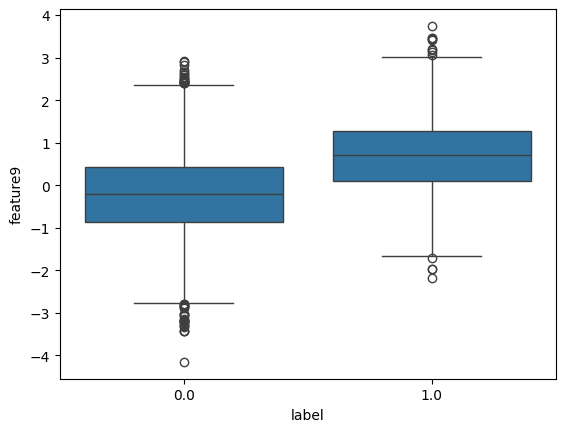

In [17]:
sns.boxplot(data=data_train,x='label',y='feature9')

In [18]:
data_train.feature10.unique()

array([0, 1])

<Axes: xlabel='feature10', ylabel='count'>

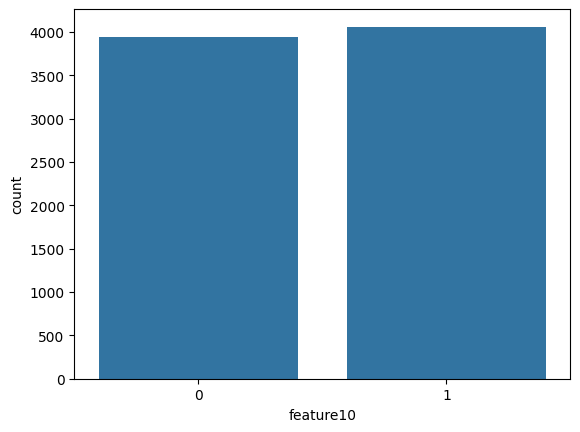

In [19]:
sns.countplot(data=data_train,x='feature10')

<Axes: xlabel='feature10', ylabel='count'>

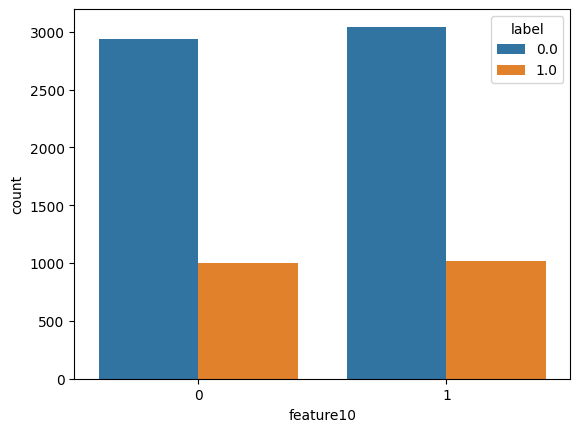

In [20]:
sns.countplot(data=data_train,x='feature10',hue='label')

We drop columns=['feature6','label','id']

## Preprocessing

In [21]:
data_train.drop(columns=['feature6','id'], inplace=True)
data_pred.drop(columns=['feature6','id'], inplace=True)
data_train

,feature1,feature2,feature3,feature4,feature5,feature7,feature8,feature9,feature10,label
0,0.496714,Category B,0,Gamma,0.639020,-1.730313,28.809456,-1.602207,0,0.0
1,-0.138264,Category D,0,Epsilon,-1.499596,0.657393,48.421778,1.219424,0,0.0
2,1.523030,Category C,1,Gamma,-0.513274,0.309410,4.187600,1.257345,0,0.0
3,-0.234137,Category B,1,Gamma,0.129776,0.589638,95.701685,0.655647,1,1.0
4,0.767435,Category C,0,Epsilon,0.151608,-0.231937,31.029100,0.162607,0,0.0
...,...,...,...,...,...,...,...,...,...,...
7995,1.194214,Category D,1,Delta,-0.436053,0.692300,54.924194,0.717847,0,1.0
7996,1.301102,Category A,1,Gamma,-1.333080,0.275313,34.677941,-0.800432,1,0.0
7997,-1.998345,Category D,1,Gamma,-0.282302,0.055227,33.616555,-1.615167,1,0.0
7998,-0.705317,Category A,1,Gamma,-0.093354,0.929104,12.334212,-0.311622,0,0.0


In [22]:
data_train.feature2.unique()
data_train.feature4.unique()

array(['Gamma', 'Epsilon', 'Delta', 'Alpha', 'Beta'], dtype=object)

In [23]:
data_train.replace({'feature2': {'Category A': 0, 'Category B': 1, 'Category C': 2, 'Category D': 3 }}, inplace=True)
data_train.replace({'feature4': {'Gamma': 0, 'Epsilon': 1, 'Delta': 2, 'Alpha': 3, 'Beta': 4 }}, inplace=True)

data_pred.replace({'feature2': {'Category A': 0, 'Category B': 1, 'Category C': 2, 'Category D': 3 }}, inplace=True)
data_pred.replace({'feature4': {'Gamma': 0, 'Epsilon': 1, 'Delta': 2, 'Alpha': 3, 'Beta': 4 }}, inplace=True)

data_train

/tmp/ipykernel_2593/2994419388.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_train.replace({'feature2': {'Category A': 0, 'Category B': 1, 'Category C': 2, 'Category D': 3 }}, inplace=True)
/tmp/ipykernel_2593/2994419388.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_train.replace({'feature4': {'Gamma': 0, 'Epsilon': 1, 'Delta': 2, 'Alpha': 3, 'Beta': 4 }}, inplace=True)
/tmp/ipykernel_2593/2994419388.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. 

,feature1,feature2,feature3,feature4,feature5,feature7,feature8,feature9,feature10,label
0,0.496714,1,0,0,0.639020,-1.730313,28.809456,-1.602207,0,0.0
1,-0.138264,3,0,1,-1.499596,0.657393,48.421778,1.219424,0,0.0
2,1.523030,2,1,0,-0.513274,0.309410,4.187600,1.257345,0,0.0
3,-0.234137,1,1,0,0.129776,0.589638,95.701685,0.655647,1,1.0
4,0.767435,2,0,1,0.151608,-0.231937,31.029100,0.162607,0,0.0
...,...,...,...,...,...,...,...,...,...,...
7995,1.194214,3,1,2,-0.436053,0.692300,54.924194,0.717847,0,1.0
7996,1.301102,0,1,0,-1.333080,0.275313,34.677941,-0.800432,1,0.0
7997,-1.998345,3,1,0,-0.282302,0.055227,33.616555,-1.615167,1,0.0
7998,-0.705317,0,1,0,-0.093354,0.929104,12.334212,-0.311622,0,0.0


In [24]:
data_train['feature2'] = data_train['feature2'].astype('category')
data_train['feature4'] = data_train['feature4'].astype('category')

data_pred['feature2'] = data_pred['feature2'].astype('category')
data_pred['feature4'] = data_pred['feature4'].astype('category')

<Axes: >

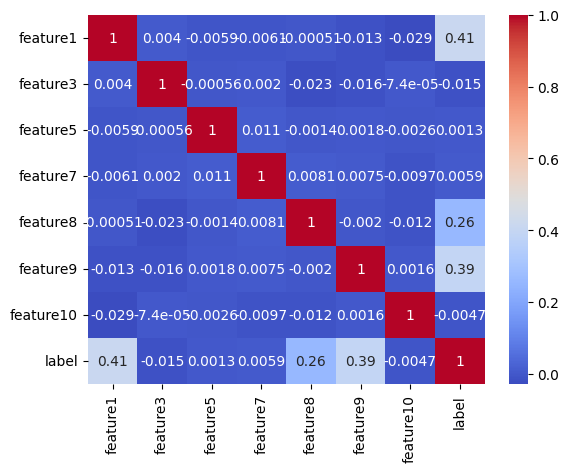

In [25]:
corr_matix = data_train.select_dtypes(include="number").corr()
sns.heatmap(corr_matix, annot=True, cmap='coolwarm')

In [26]:
# One-hot-encoding
data_train = pd.get_dummies(data=data_train, columns=['feature2','feature4',],dtype=int)
data_pred = pd.get_dummies(data=data_pred, columns=['feature2','feature4',],dtype=int)

data_train

,feature1,feature3,feature5,feature7,feature8,feature9,feature10,label,feature2_0,feature2_1,feature2_2,feature2_3,feature4_0,feature4_1,feature4_2,feature4_3,feature4_4
0,0.496714,0,0.639020,-1.730313,28.809456,-1.602207,0,0.0,0,1,0,0,1,0,0,0,0
1,-0.138264,0,-1.499596,0.657393,48.421778,1.219424,0,0.0,0,0,0,1,0,1,0,0,0
2,1.523030,1,-0.513274,0.309410,4.187600,1.257345,0,0.0,0,0,1,0,1,0,0,0,0
3,-0.234137,1,0.129776,0.589638,95.701685,0.655647,1,1.0,0,1,0,0,1,0,0,0,0
4,0.767435,0,0.151608,-0.231937,31.029100,0.162607,0,0.0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,1.194214,1,-0.436053,0.692300,54.924194,0.717847,0,1.0,0,0,0,1,0,0,1,0,0
7996,1.301102,1,-1.333080,0.275313,34.677941,-0.800432,1,0.0,1,0,0,0,1,0,0,0,0
7997,-1.998345,1,-0.282302,0.055227,33.616555,-1.615167,1,0.0,0,0,0,1,1,0,0,0,0
7998,-0.705317,1,-0.093354,0.929104,12.334212,-0.311622,0,0.0,1,0,0,0,1,0,0,0,0


In [27]:
# We drop columns after the one-hot-encoding in order to avoid multicolinearity 
data_train.drop(columns=['feature2_0','feature4_0'])
data_pred.drop(columns=['feature2_0','feature4_0'])

data_train

,feature1,feature3,feature5,feature7,feature8,feature9,feature10,label,feature2_0,feature2_1,feature2_2,feature2_3,feature4_0,feature4_1,feature4_2,feature4_3,feature4_4
0,0.496714,0,0.639020,-1.730313,28.809456,-1.602207,0,0.0,0,1,0,0,1,0,0,0,0
1,-0.138264,0,-1.499596,0.657393,48.421778,1.219424,0,0.0,0,0,0,1,0,1,0,0,0
2,1.523030,1,-0.513274,0.309410,4.187600,1.257345,0,0.0,0,0,1,0,1,0,0,0,0
3,-0.234137,1,0.129776,0.589638,95.701685,0.655647,1,1.0,0,1,0,0,1,0,0,0,0
4,0.767435,0,0.151608,-0.231937,31.029100,0.162607,0,0.0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,1.194214,1,-0.436053,0.692300,54.924194,0.717847,0,1.0,0,0,0,1,0,0,1,0,0
7996,1.301102,1,-1.333080,0.275313,34.677941,-0.800432,1,0.0,1,0,0,0,1,0,0,0,0
7997,-1.998345,1,-0.282302,0.055227,33.616555,-1.615167,1,0.0,0,0,0,1,1,0,0,0,0
7998,-0.705317,1,-0.093354,0.929104,12.334212,-0.311622,0,0.0,1,0,0,0,1,0,0,0,0


In [28]:
# Feature Engineering
# Select only numeric and binary columns for basic logistic regression
#features = ['feature1', 'feature3', 'feature5', 'feature7', 'feature8', 'feature9', 'feature10']

X_train = data_train.drop(columns=['label'])
y_train = data_train['label'].astype(int)

X_test = data_pred.drop(columns=['label'])

In [29]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [30]:
model = LogisticRegression()
model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred = model.predict(X_test)

In [31]:
data_prediction['prediction'] = y_pred

In [32]:
# Prepare upload
# The structure of the prediction file is as follows:
# id, prediction
# id = the id column
# prediction = the predicted value (0 or 1, integer)

data_prediction[['id', 'prediction']].to_csv('predictions.csv', index=False)

In [35]:
from sklearn.metrics import mean_squared_error, accuracy_score

accuracy = accuracy_score(y_train,y_pred_train)
print(f'accuracy: {accuracy}')

MSE = mean_squared_error(y_train, y_pred_train)
print(f'mean square error: {MSE}')

accuracy: 0.88125
mean square error: 0.11875


Once you generated the data set, go the [midterm platform](https://acmanager.dss.cit.tum.de/) and create a new submission.

In [36]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)

y_pred_train_rfc = rfc.predict(X_train)
y_pred_rfc = rfc.predict(X_test)

In [37]:
accuracy_rfc = accuracy_score(y_train,y_pred_train_rfc)
print(f'accuracy: {accuracy_rfc}')

MSE_rfc = mean_squared_error(y_train, y_pred_train_rfc)
print(f'mean square error: {MSE_rfc}')

accuracy: 1.0
mean square error: 0.0


In [39]:
data_prediction['prediction'] = y_pred_rfc
data_prediction[['id', 'prediction']].to_csv('predictions.csv', index=False)